In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
import datetime
from datetime import date
import os
import wget
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline 

## DATA COLLECTION

In [2]:
# DATA at these urls are updated on daily basis
# data for confirmed cases
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063


In [4]:
    
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,113,113,113,113,113,114,114,114,115,115
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,524,526,527,530,530,532,532,532,533,533


In [6]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49681,49681,49737,49743,49752,49802,49937,49994,49994,50013
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,83954,84625,85147,85846,86497,87193,87760,88349,88899,89456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,80455,80566,80659,80887,80981,81065,81065,81160,81242,81316
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10925,10952,10973,11014,11050,11082,11111,11149,11172,11204
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20065,20068,20073,20090,20099,20172,20190,20250,20269,20289


In [8]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [9]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-16 04:44:59,34.223334,-82.461707,165,1,0,164.0,"Abbeville, South Carolina, US",672.728014,0.606061
1,22001.0,Acadia,Louisiana,US,2020-07-16 04:44:59,30.295065,-92.414197,1510,46,0,1464.0,"Acadia, Louisiana, US",2433.717463,3.046358
2,51001.0,Accomack,Virginia,US,2020-07-16 04:44:59,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-16 04:44:59,43.452658,-116.241552,4836,28,0,4808.0,"Ada, Idaho, US",1004.179930,0.578991
4,19001.0,Adair,Iowa,US,2020-07-16 04:44:59,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


### DATA PRE PROCESSING

In [10]:
## attributes
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/19/21', '3/20/21', '3/21/21', '3/22/21', '3/23/21', '3/24/21',
       '3/25/21', '3/26/21', '3/27/21', '3/28/21'],
      dtype='object', length=436)

In [11]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [12]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21
0,0,0,0,0,0,0,0,0,0,0,...,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294
1,0,0,0,0,0,0,0,0,0,0,...,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134
2,0,0,0,0,0,0,0,0,0,0,...,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836
3,0,0,0,0,0,0,0,0,0,0,...,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850
4,0,0,0,0,0,0,0,0,0,0,...,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,2,2,2,2,2,2,2,2,2,...,2571,2572,2572,2575,2575,2576,2579,2586,2586,2591
270,0,0,0,0,0,0,0,0,0,0,...,219912,221391,223638,225976,228044,230076,232038,233549,234748,236462
271,0,0,0,0,0,0,0,0,0,0,...,3217,3278,3418,3516,3612,3703,3816,3900,3969,4033
272,0,0,0,0,0,0,0,0,0,0,...,86059,86273,86449,86535,86779,86993,87318,87583,87583,87872


In [13]:
# Range of date
dates = confirmed.keys()

# Confirmed

india_cases = []

# Death

india_deaths = []

# Recovered

india_recoveries = []

In [14]:
# Fill with the dataset
for i in dates:


    
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
   
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
   
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())



## Active Cases Forecasting

In [15]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [16]:
#confirmed cases
india_daily_increase = daily_increase(india_cases)

In [17]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [18]:
# Dates pre processing
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)

days_in_future = 0
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [19]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [20]:
future_forecast_dates[0:5]

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020']

In [21]:
dataCovid= pd.DataFrame({ 'Dates': future_forecast_dates , 'Daily Increase':india_daily_increase })

In [22]:
dataCovid

,Dates,Daily Increase
0,01/22/2020,0
1,01/23/2020,0
2,01/24/2020,0
3,01/25/2020,0
4,01/26/2020,0
...,...,...
427,03/24/2021,53476
428,03/25/2021,59118
429,03/26/2021,62258
430,03/27/2021,62714


In [23]:
from pmdarima import auto_arima

In [24]:
train = dataCovid[:int(0.7*(len(dataCovid)))]
valid = dataCovid[int(0.7*(len(dataCovid))):]

In [25]:
#preprocessing (since arima takes univariate series as input)
train.drop('Dates',axis=1,inplace=True)
valid.drop('Dates',axis=1,inplace=True)


In [26]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5824.857, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5854.561, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5853.102, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5848.044, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5852.989, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5824.064, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5820.633, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5825.211, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5835.735, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5785.833, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5777.729, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5790.176, Time=0.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5795.742, Time=0.35 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : 

In [27]:
def ARIMAmodel(series, order, days = 21):
    # Fitting and forecast the series
    train = [x for x in series]
    model = ARIMA(train, order = order)
    model_fit = model.fit(disp=0)
    forecast, err, ci = model_fit.forecast(steps = days, alpha = 0.05)
    start_day = date.today() + datetime.timedelta(days = 1)
    predictions_df = pd.DataFrame({'Forecast':forecast.round()}, index=pd.date_range(start = start_day, periods=days, freq='D'))
    return predictions_df, ci

def plot_results(series, df_forecast, ci, label):
    start_covid_day = date(2020, 1, 22)
    series = pd.DataFrame({'Real data':series}, index=pd.date_range(start = start_covid_day, periods=series.shape[0], freq='D'))
    ax = series.plot(label = 'Real Data', figsize = (20, 15))
    df_forecast.plot(ax = ax, label='Forecast', color = 'r')
    ax.fill_between(df_forecast.index,
                    ci[:,0],
                    ci[:,1], color='b', alpha=.25)
    ax.set_xlabel('Days')
    ax.set_ylabel(label)
    ax.set_title(label + ' Forecasting')
    plt.legend()
    #plt.savefig('plots/' + label + '.png')

In [28]:
new_positives = dataCovid['Daily Increase'].values

In [29]:
order = {
    'new_positives': (2, 1, 5),
    
}

In [30]:
new_positives_today=new_positives[-1]

In [31]:
# Forecasting with ARIMA models
new_positives_pred, new_positives_ci = ARIMAmodel(new_positives, order['new_positives'])

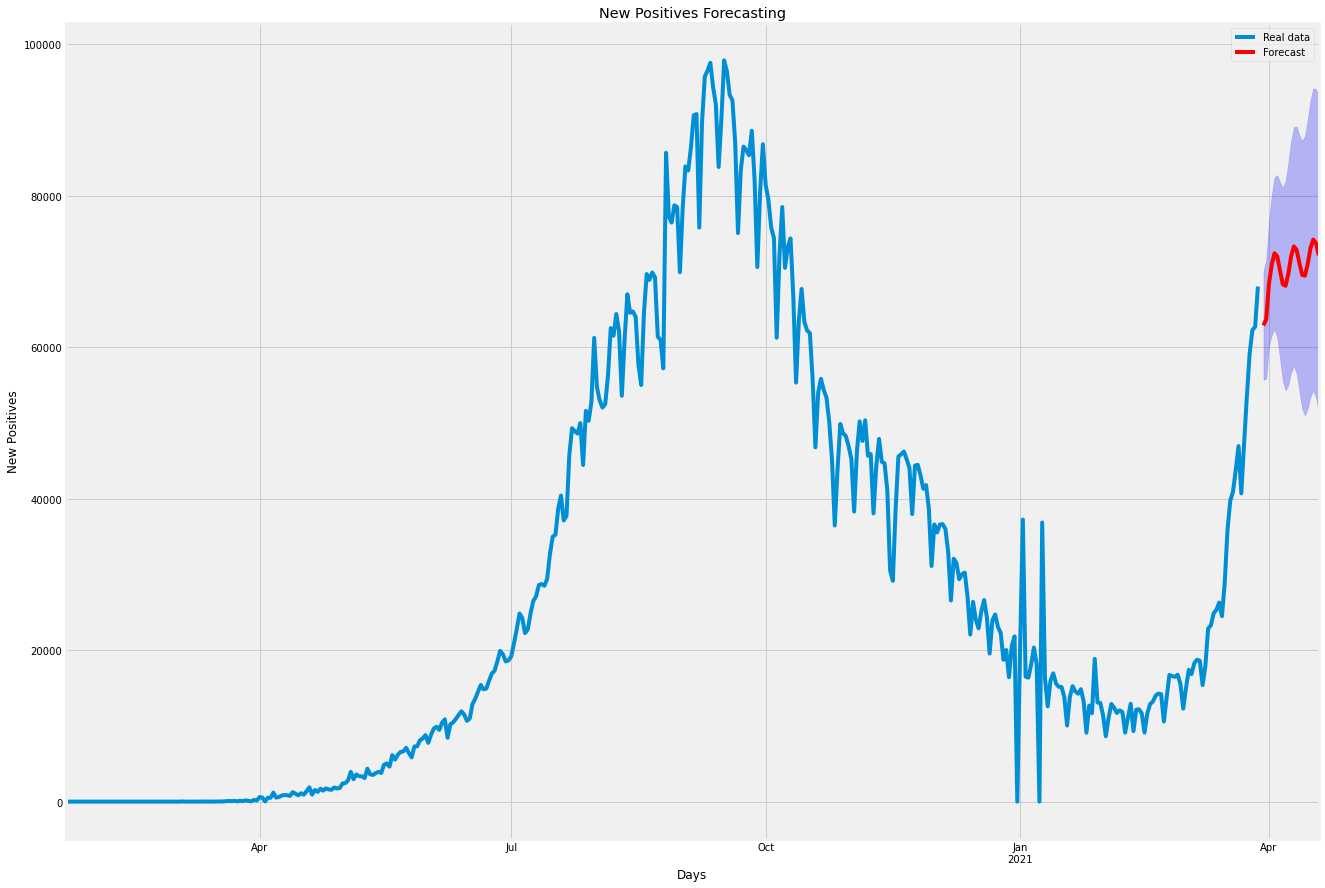

In [32]:
# Plot Results ; The blue plot gives graphs of new postive cases till now ,
# while red plot on graph shows the forecast for next 21 days
plot_results(new_positives, new_positives_pred, new_positives_ci, 'New Positives')
 

## Death Cases Forecasting

In [33]:
india_daily_deaths =  daily_increase(india_deaths)
india_daily_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543,
 681,
 585,
 650,
 1129,
 740,
 757,
 702,
 711,
 637,
 785,
 762,
 763,
 793,
 853,
 771,
 803,
 857

In [34]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
days_in_future = 0
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [35]:
future_forecast_dates[0:5]

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020']

In [36]:
dataCovid = pd.DataFrame({ 'Dates': future_forecast_dates , 'Daily Deaths':india_daily_deaths})
dataCovid

,Dates,Daily Deaths
0,01/22/2020,0
1,01/23/2020,0
2,01/24/2020,0
3,01/25/2020,0
4,01/26/2020,0
...,...,...
427,03/24/2021,251
428,03/25/2021,257
429,03/26/2021,291
430,03/27/2021,312


In [37]:
from pmdarima import auto_arima
train = dataCovid[:int(0.7*(len(dataCovid)))]
valid = dataCovid[int(0.7*(len(dataCovid))):]
#preprocessing (since arima takes univariate series as input)
train.drop('Dates',axis=1,inplace=True)
valid.drop('Dates',axis=1,inplace=True)

In [38]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3772.042, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3896.033, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3829.012, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3766.514, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3894.080, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3768.475, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3768.470, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3770.112, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3765.395, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3767.364, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3767.360, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3827.123, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3769.006, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.352 seconds


In [39]:
def ARIMAmodel(series, order, days = 21):
    # Fitting and forecast the series
    train = [x for x in series]
    model = ARIMA(train, order = order)
    model_fit = model.fit(disp=0)
    forecast, err, ci = model_fit.forecast(steps = days, alpha = 0.05)
    start_day = date.today() + datetime.timedelta(days = 1)
    predictions_df = pd.DataFrame({'Forecast':forecast.round()}, index=pd.date_range(start = start_day, periods=days, freq='D'))
    return predictions_df, ci

def plot_results(series, df_forecast, ci, label):
    start_covid_day = date(2020, 1, 22)
    series = pd.DataFrame({'Real data':series}, index=pd.date_range(start = start_covid_day, periods=series.shape[0], freq='D'))
    ax = series.plot(label = 'Real Data', figsize = (20, 15))
    df_forecast.plot(ax = ax, label='Forecast', color = 'r')
    ax.fill_between(df_forecast.index,
                    ci[:,0],
                    ci[:,1], color='b', alpha=.25)
    ax.set_xlabel('Days')
    ax.set_ylabel(label)
    ax.set_title(label + ' Forecasting')
    plt.legend()
    #plt.savefig('plots/' + label + '.png')

In [40]:
new_deaths = dataCovid['Daily Deaths'].values
order = {
    'new_deaths': (5, 1, 2),
    
}
new_deaths_today=new_deaths[-1]

In [41]:
# Forecasting with ARIMA models
new_deaths_pred, new_deaths_ci = ARIMAmodel(new_deaths, order['new_deaths'])

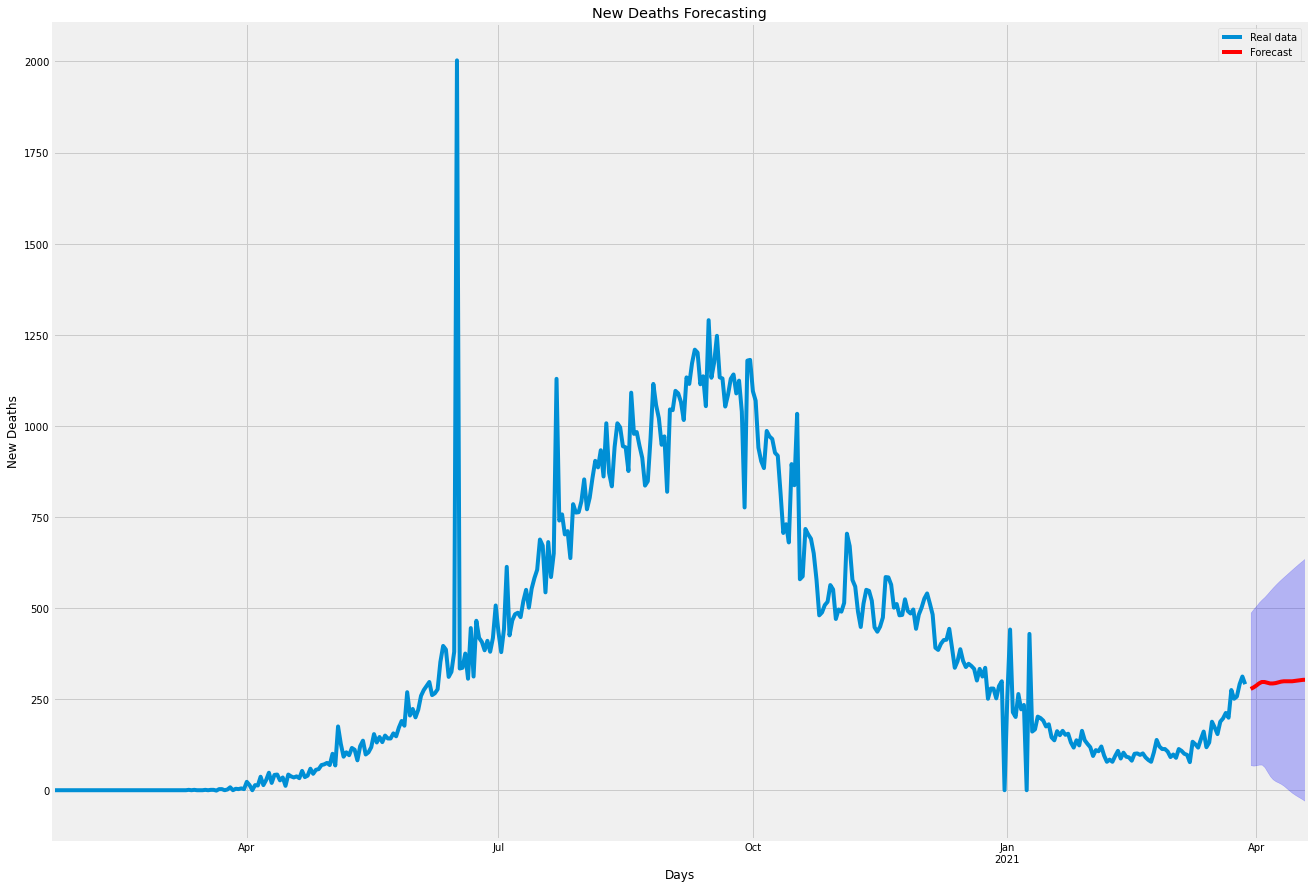

In [42]:
# Plot Results ; The blue plot gives graphs of new death cases till now ,
# while red plot on graph shows the forecast for next 21 days
plot_results(new_deaths, new_deaths_pred, new_deaths_ci, 'New Deaths')